# Explanation
This notebook is for "American Express - Default Prediction" on Kaggle: https://www.kaggle.com/competitions/amex-default-prediction/<br>
The dataset used in notebook comes from MUNUM: https://www.kaggle.com/datasets/munumbutt/amexfeather<br>
This EDA is related to "model_American_Express_default_analysis" in my github repository

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import gc
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 10000000)
pd.set_option('display.max_rows', 10000000)
pd.set_option("display.max_colwidth", 1000)
np.set_printoptions(threshold=np.inf)

## Prepare Dataset

In [2]:
for data in ["test", "train"]:
    df = pd.read_feather(f'../input/amexfeather/{data}_data.ftr')    
    df = df.groupby('customer_ID').tail(1).set_index('customer_ID')
    
    if data == "test":
        df_test = df
    else:
        df_train = df
df_train_label = pd.read_csv("../input/amex-default-prediction/train_labels.csv")
df_train_label = df_train_label.set_index("customer_ID")

del df
gc.collect()

30

## Number of data on each day

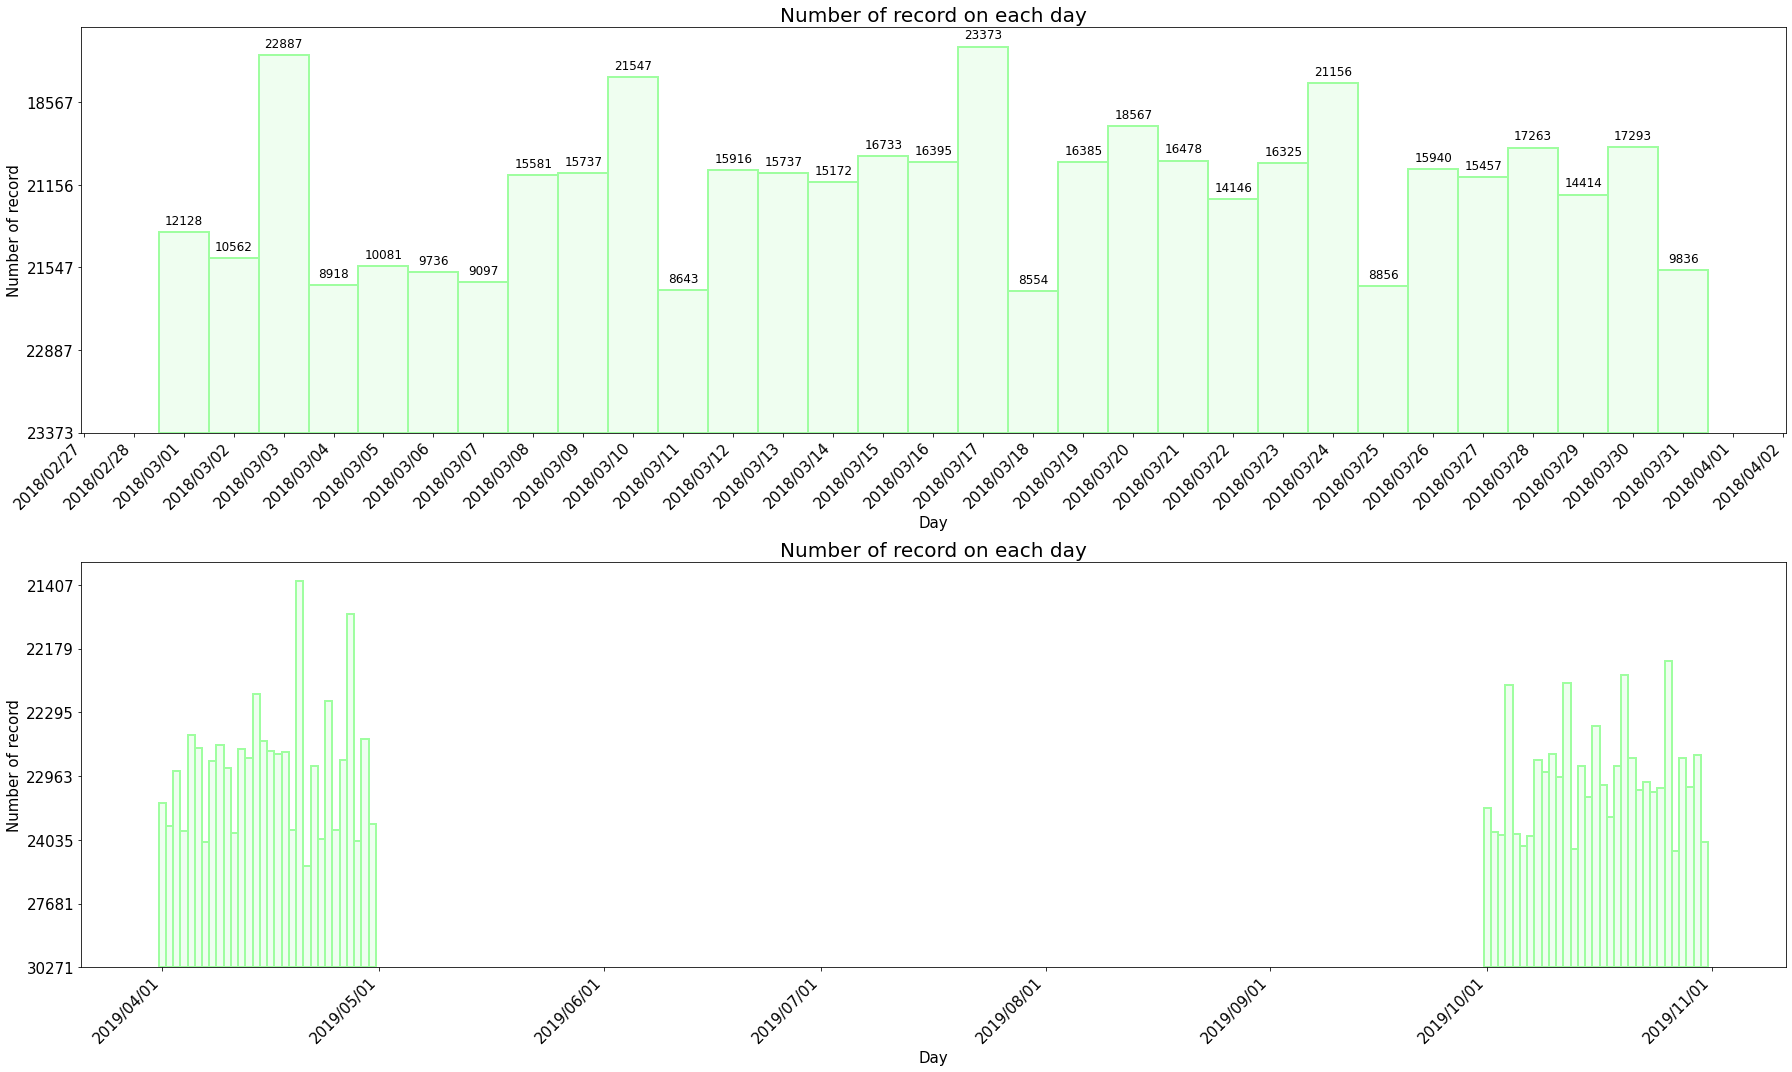

In [3]:
from matplotlib.dates import DateFormatter, MonthLocator
import matplotlib.ticker as mticker

x_train = df_train["S_2"].value_counts().index
y_train = df_train["S_2"].value_counts().values

x_test = df_test["S_2"].value_counts().index
y_test = df_test["S_2"].value_counts().values

# from IPython.core.debugger import Pdb; Pdb().set_trace()


fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(
        211,
        facecolor="white",
    )
p1 = ax.bar(x_train, y_train, color='#effef0', edgecolor='#9ffea0', width=1, linewidth=2)
ax.set_xticklabels(x_train, rotation=45, ha="right", size=15)
ax.set_yticklabels(y_train,size=15)
ax.set_xlabel("Day", size=15)
ax.set_ylabel("Number of record", size=15)
ax.xaxis.set_major_formatter(DateFormatter('%Y/%m/%d'))
ax.xaxis.set_major_locator(mticker.MultipleLocator(1))
ax.tick_params(axis="both")
ax.bar_label(p1, label_type='edge', padding=5, fontsize=12)
ax.set_title("Number of record on each day", fontsize=20)


ax = fig.add_subplot(
        212,
        facecolor="white",
    )
p1 = ax.bar(x_test, y_test, color='#effef0', edgecolor='#9ffea0', width=1, linewidth=2)
ax.set_xticklabels(x_test, rotation=45, ha="right", size=15)
ax.set_yticklabels(y_test,size=15)
ax.set_xlabel("Day", size=15)
ax.set_ylabel("Number of record", size=15)
ax.xaxis.set_major_formatter(DateFormatter('%Y/%m/%d'))
ax.xaxis.set_major_locator(MonthLocator())
ax.set_title("Number of record on each day", fontsize=20)


fig.tight_layout()
fig.show()

## Default Ratio

Int64Index([0, 1], dtype='int64')
[340085 118828]


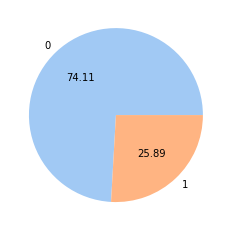

In [4]:
x = df_train["target"].value_counts().index
y = df_train["target"].value_counts().values

print(x)
print(y)

sns.set_palette("pastel")

fig = plt.figure()
ax = fig.add_subplot(111)
ax.pie(y, labels=x, autopct="%.2f")

fig.show()

In [5]:
categorical = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

In [6]:
df_train_categorical = df_train[categorical]
df_train.drop(categorical, axis="columns", inplace=True)
print(df_train_categorical.shape)
print(df_train.shape)


df_test_categorical = df_test[categorical]
df_test.drop(categorical, axis="columns", inplace=True)
print(df_test_categorical.shape)
print(df_test.shape)

(458913, 11)
(458913, 179)
(924621, 11)
(924621, 178)


## Data distribution on each feature

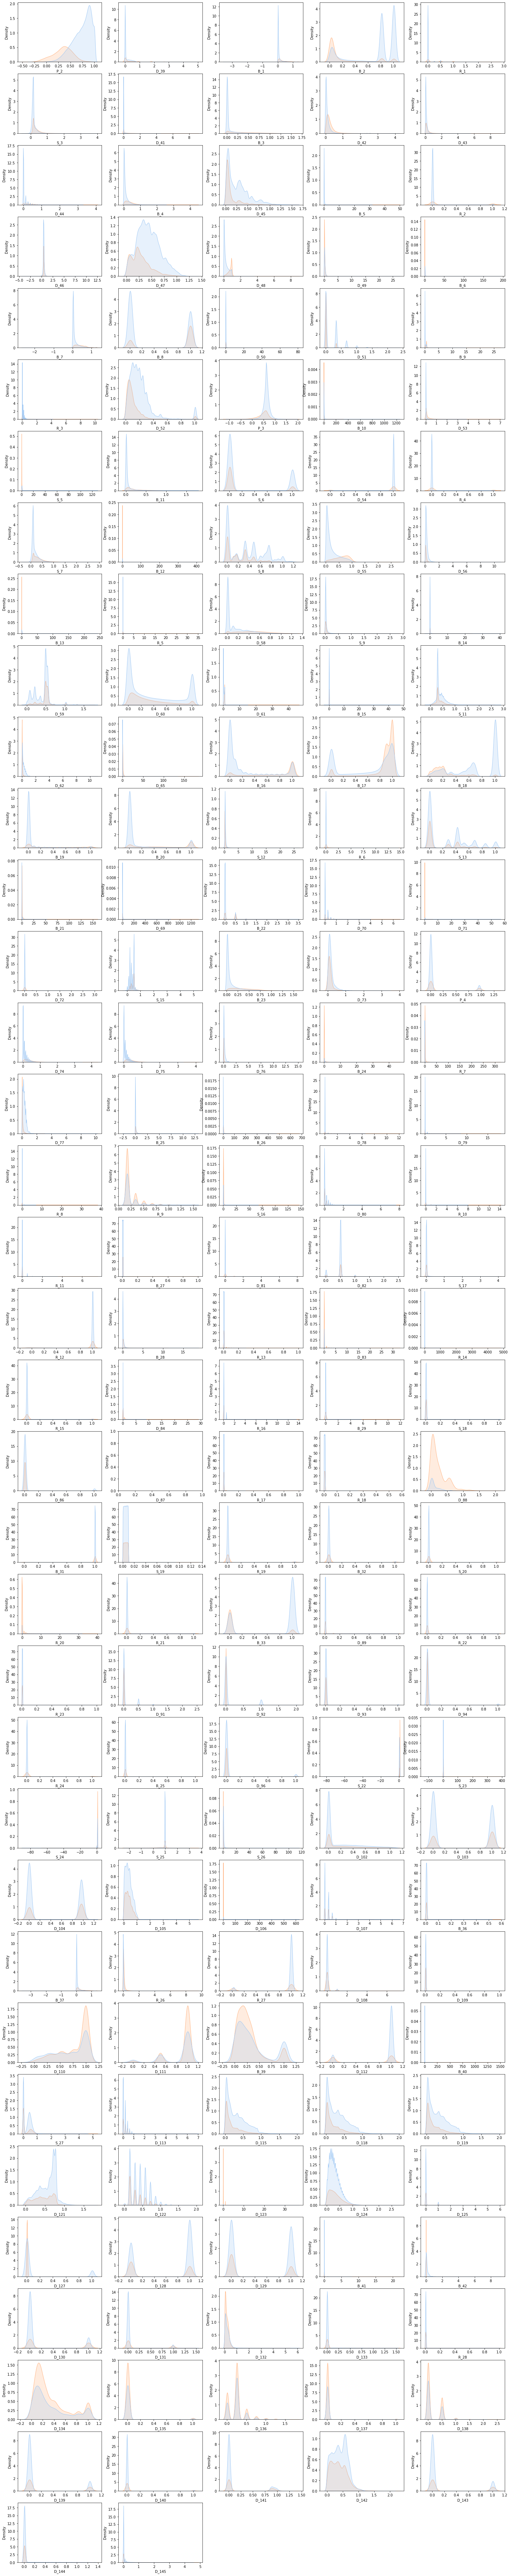

In [7]:
columns = df_train.iloc[:, 1:-1]
fig = plt.figure(figsize=(25,150))
z = 1
for column in columns:
    ax = fig.add_subplot(40,5,z)
    sns.kdeplot(data=df_train, x=column, hue="target", color="#4F81BD", fill=True, legend=False)
    z += 1

fig.show()

## Correlation

In [8]:
df_corr = df_train.corr()

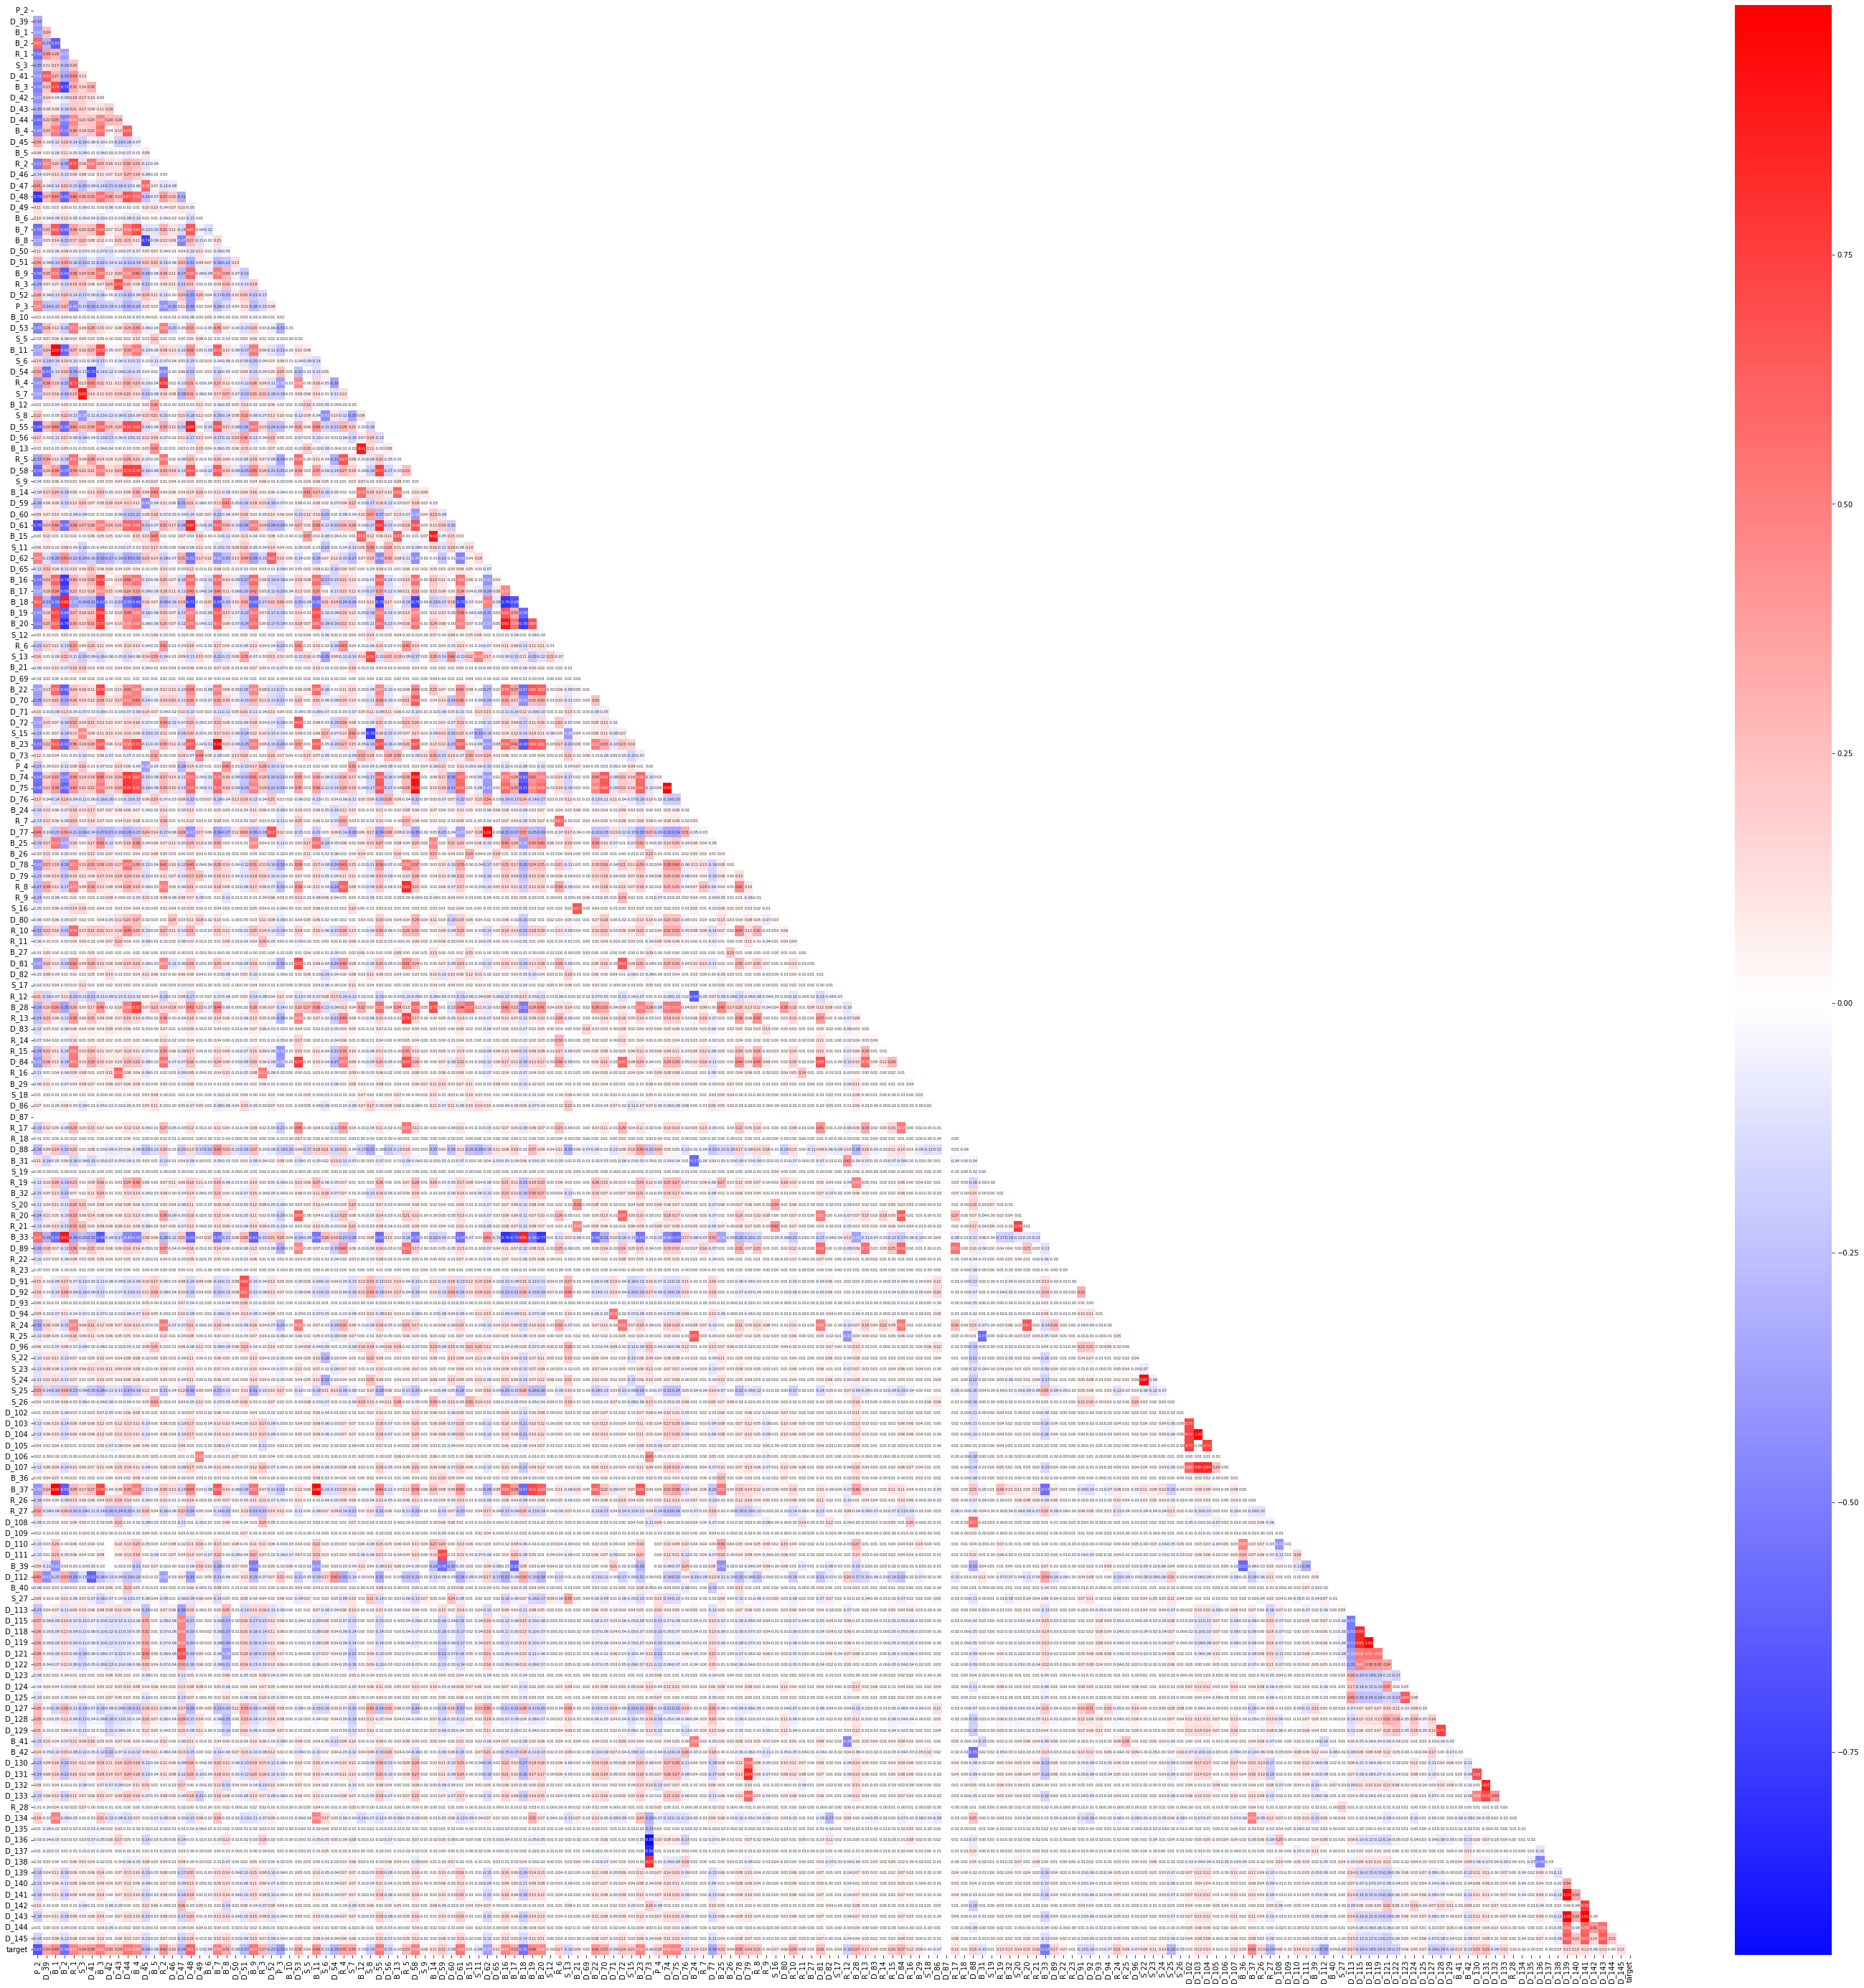

In [9]:
mask = np.triu(df_corr, k=0)
fig = plt.figure(figsize = (50, 50))
ax = fig.add_subplot()
sns.heatmap(df_corr, cmap="bwr", mask=mask, center=0, annot=True, fmt=".2f", annot_kws={"size": 5})

fig.show()

<AxesSubplot:xlabel='B_16', ylabel='B_33'>

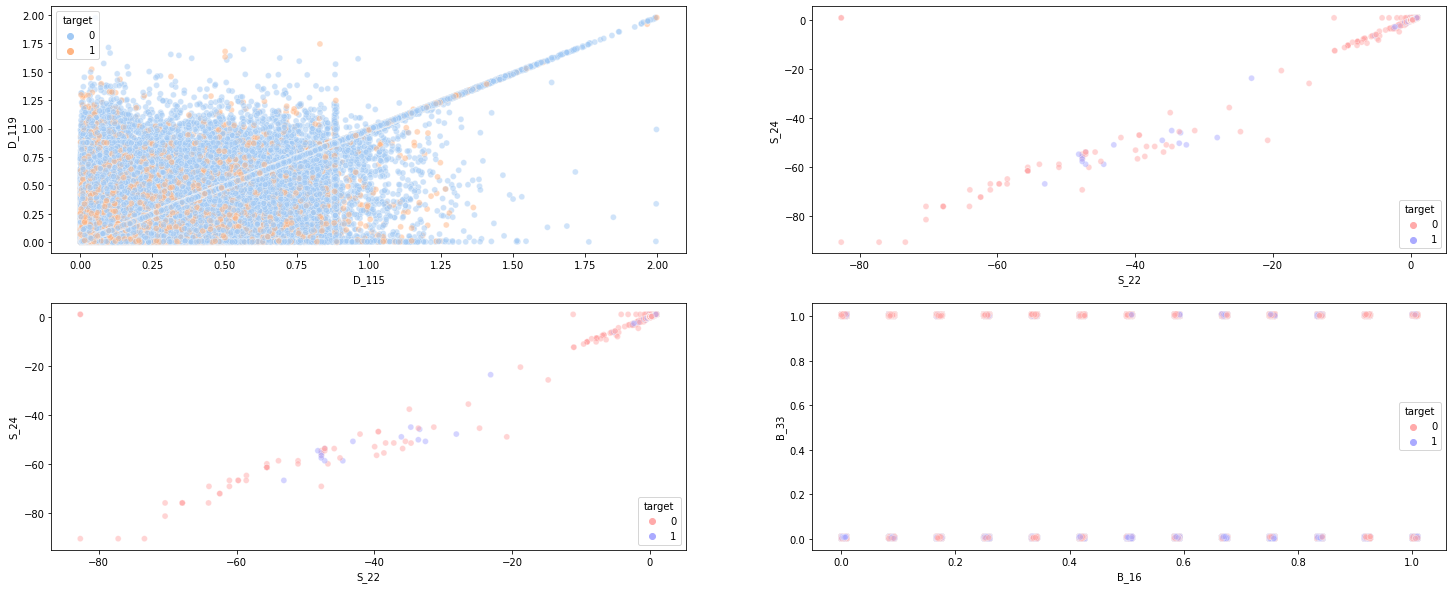

In [10]:
x_1 = df_train["S_22"]
y_1 = df_train["S_24"]
x_2 = df_train["D_115"]
y_2 = df_train["D_119"]
x_3 = df_train["S_22"]
y_3 = df_train["S_24"]
x_4 = df_train["B_16"]
y_4 = df_train["B_33"]


fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(
    221,
    facecolor="white",
    )

ax2 = fig.add_subplot(
    222,
    facecolor="white",
    )
sns.scatterplot(data=df_train, x=x_2, y=y_2, palette="pastel", hue="target", alpha=0.5, ax=ax1)
sns.scatterplot(data=df_train, x=x_1, y=y_1, palette="bwr_r", hue="target", alpha=0.5, ax=ax2)
ax3 = fig.add_subplot(
    223,
    facecolor="white",
    )
sns.scatterplot(data=df_train, x=x_3, y=y_3, palette="bwr_r", hue="target", alpha=0.5)
ax4 = fig.add_subplot(
    224,
    facecolor="white",
    )
sns.scatterplot(data=df_train, x=x_4, y=y_4, palette="bwr_r", hue="target", alpha=0.5)

In [11]:
df_corr_sort = df_corr["target"].sort_values(ascending=False)[1:-1]
df_corr_sort.shape
index = df_corr_sort.index
corr = df_corr_sort

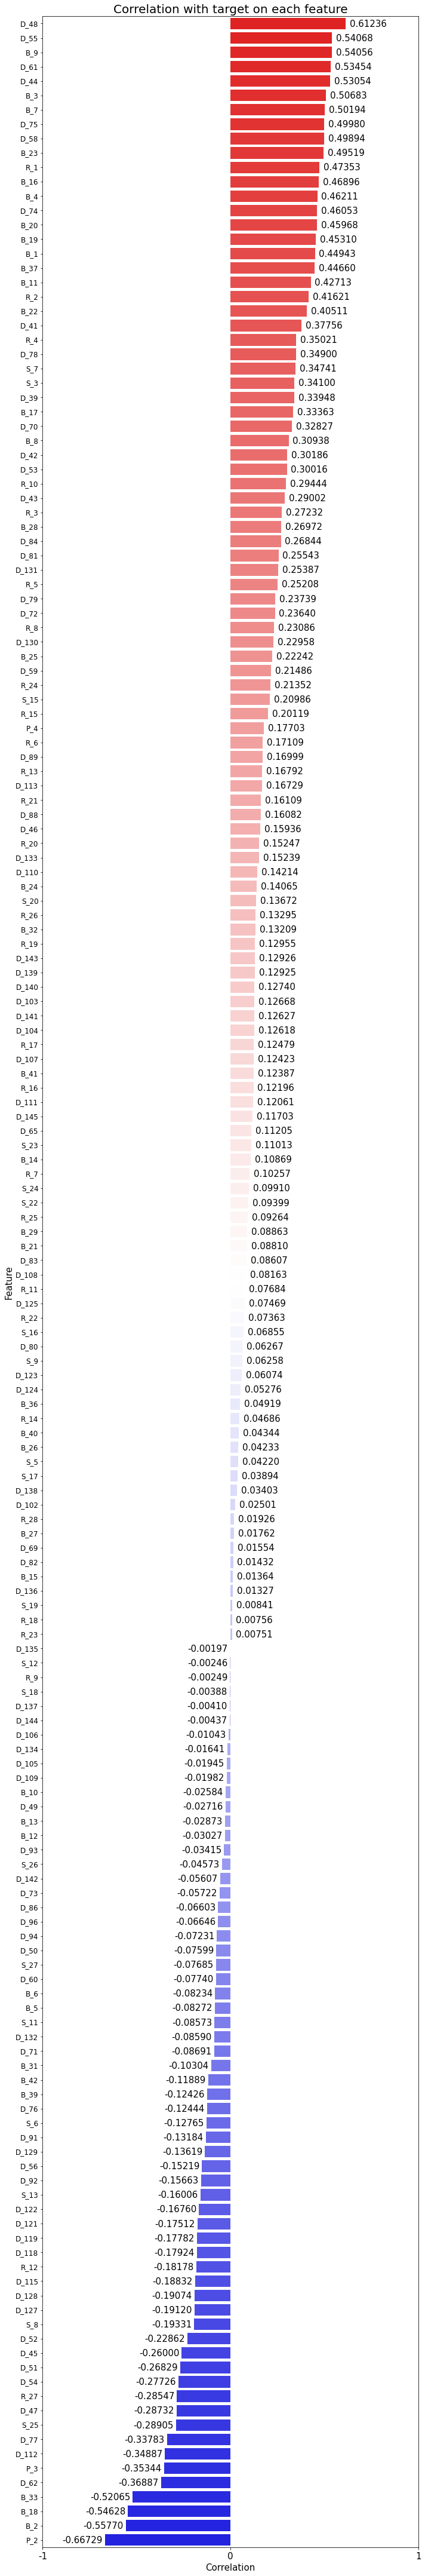

In [12]:
fig = plt.figure(figsize=(10, 60))
ax = fig.add_subplot(
    111,
    facecolor="white",
)

# set type of figure
sns.barplot(y=index, x=corr, palette="bwr_r")

# set x axis
ax.set_xticks([-1,0,1])
ax.set_xticklabels([-1,0,1], size=15, horizontalalignment="center")
ax.set_xlabel("Correlation", size=15)

# set y axis
ax.set_yticklabels(index, size=12, verticalalignment="center")
ax.set_ylabel("Feature", size=15)

# set figure title
ax.set_title("Correlation with target on each feature", fontsize=20)

# set value on each bar
def showValueOnFigure(ax, h_v="h"):
    if h_v == "v":
        for p in ax.patches:
            ax.annotate(
                format(p.get_height(), '.2f'),
                xy = (p.get_x() + p.get_width() / 2, p.get_height()),
                horizontalalignment = 'center', 
                verticalalignment = 'center', 
                fontsize = 15,
                color = 'black'
               )
    elif h_v == "h":
        for p in ax.patches:
            if p.get_width() >= 0:
                space = 0.12
            elif p.get_width() < 0:
                space = -0.12
            ax.annotate(
                format(p.get_width(), '.5f'),
                xy = (p.get_x() + p.get_width() + float(space), p.get_y() + p.get_height() / 2),
                horizontalalignment = 'center', 
                verticalalignment = 'center', 
                fontsize = 15,
                color = 'black'
               )
showValueOnFigure(ax)

fig.tight_layout()
fig.show()

## Categorical features

In [13]:
df_target = df_train["target"]
df_categorical_concat = pd.concat([df_train_categorical, df_target], axis=1)

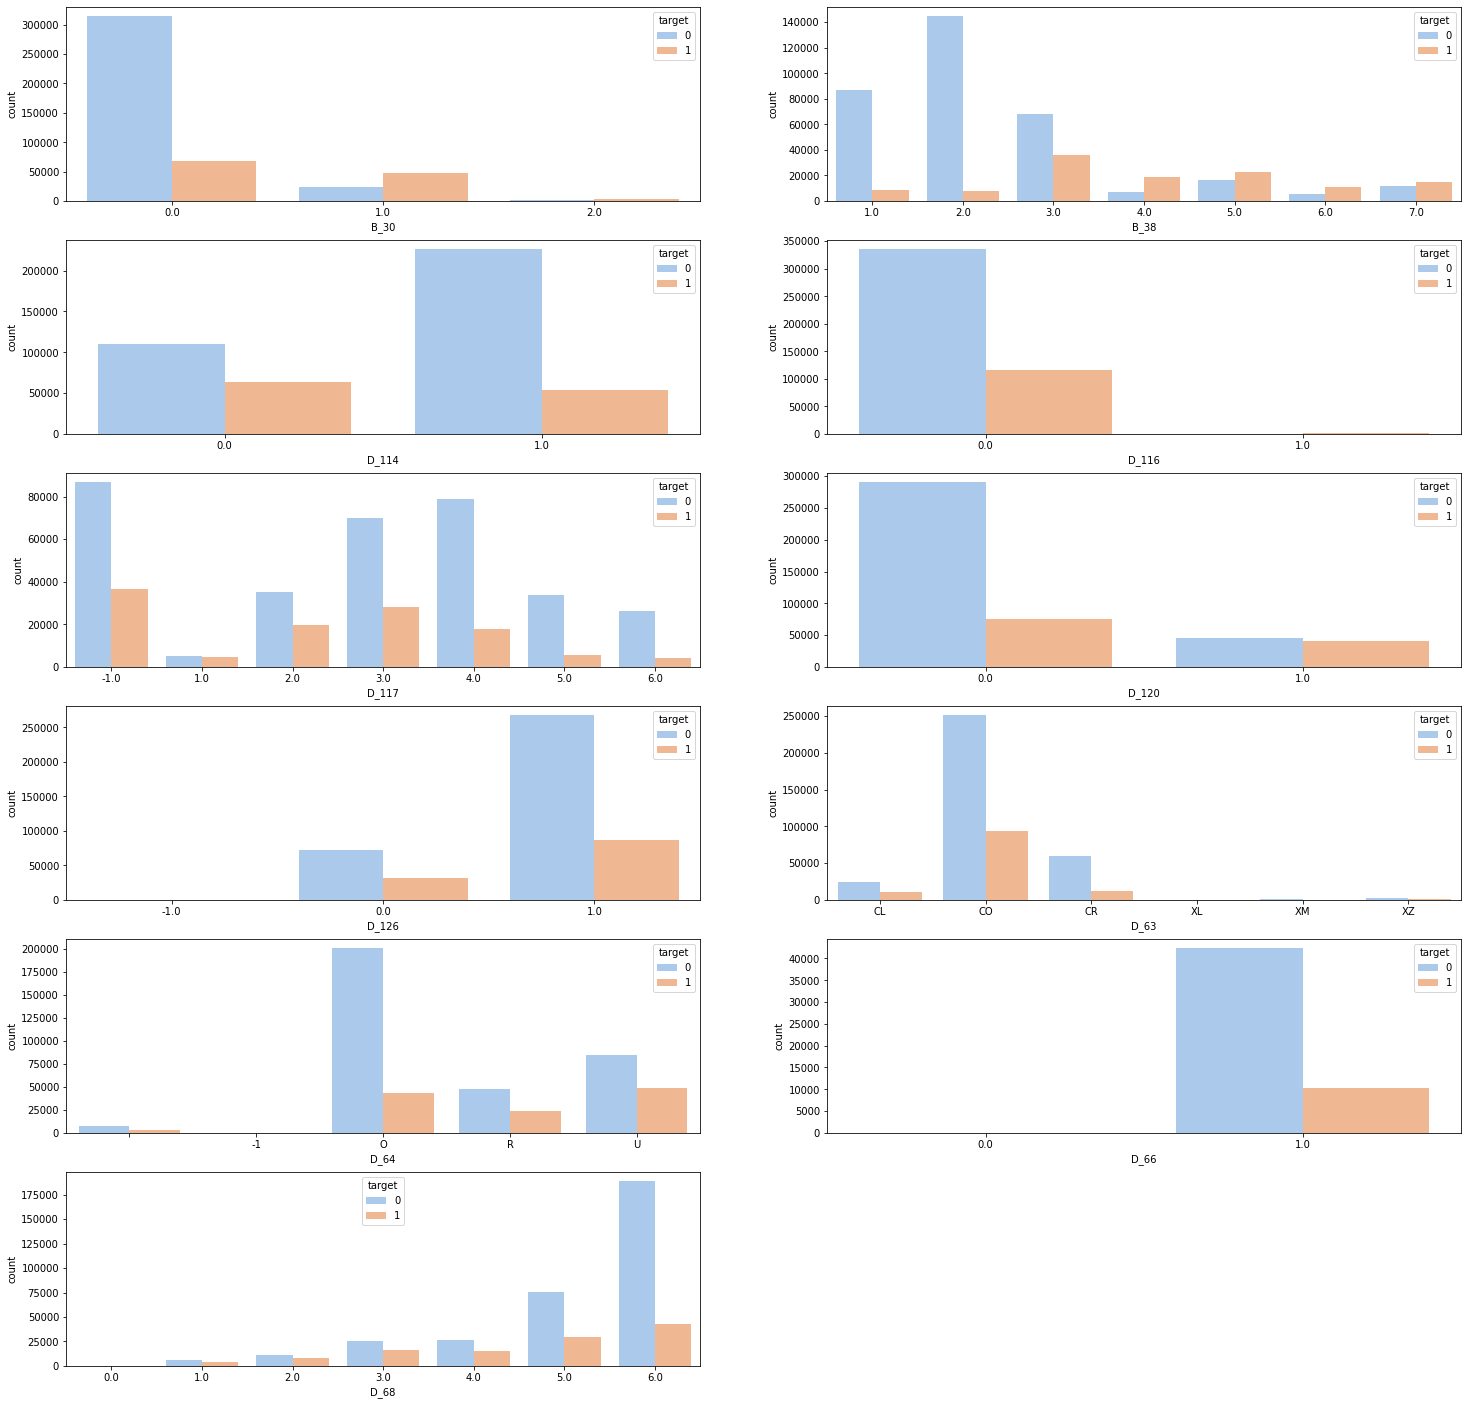

In [14]:
fig = plt.figure(figsize=(25,25))
x = 1

for i in df_train_categorical.columns:
    ax = fig.add_subplot(
        6,2,x,
        facecolor="white",
    )
    sns.countplot(data = df_categorical_concat, x=df_categorical_concat[i], hue="target")
    x += 1